In [2]:
import pyarrow.parquet as pq
import pandas as pd

# Parquet 파일 읽기
table = pq.read_table('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201812_train_마케팅정보.parquet')
df = table.to_pandas()

df.to_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201812_train_마케팅정보.csv', index=False, encoding = 'euc-kr')

In [4]:
import pyarrow.parquet as pq
import pandas as pd

# Parquet 파일 읽기
file_path = 'C:/Users/tnfus/Downloads/open/train/1.회원정보/201812_train_회원정보.parquet'
table = pq.read_table(file_path)

# 테이블을 데이터프레임으로 변환
df = table.to_pandas()

# 열 인덱스를 기반으로 2, 3, 4, 5번째 열 선택
selected_columns = df.iloc[:, 1:5]  # 인덱스 1부터 4까지 (0부터 시작)

# CSV로 저장
output_path = 'C:/Users/tnfus/Downloads/open/train/1.회원정보/selected_columns.csv'
selected_columns.to_csv(output_path, index=False, encoding='utf-8-sig')

In [6]:
df1 = pd.read_csv('C:/Users/tnfus/Downloads/open/train/train_회원정보.csv', encoding = 'UTF-8')
df2 = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201812_train_마케팅정보.csv', encoding = 'euc-kr')
# ID 기준으로 병합 (inner join)
merged_df = pd.merge(df1, df2, on='ID', how='outer')

# 병합 결과를 CSV로 저장
merged_df.to_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201812_train_마케팅정보_merged.csv', index=False, encoding='euc-kr')

In [9]:
df1.columns

Index(['ID', '남녀구분코드', '연령', 'Segment'], dtype='object')

In [12]:
# 각 값의 빈도수 계산
segment_counts = merged_df['Segment'].value_counts()

# 결과 출력
print("Segment 열의 값 빈도수:")
print(segment_counts)

Segment 열의 값 빈도수:
Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64


클래스 가중치 적용 후 랜덤 포레스트 모델 평가
정확도: 62.57%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.09      0.00        32
           1       0.00      0.00      0.00         5
           2       0.11      0.28      0.15      4253
           3       0.25      0.24      0.25     11642
           4       0.85      0.72      0.78     64068

    accuracy                           0.63     80000
   macro avg       0.24      0.27      0.24     80000
weighted avg       0.72      0.63      0.67     80000


변수 중요도:
              Feature  Importance
46   컨택건수_이용유도_EM_R6M    0.202430
1                  연령    0.113480
50  컨택건수_이용유도_청구서_R6M    0.111947
54  컨택건수_이용유도_인터넷_R6M    0.102557
42  컨택건수_이용유도_LMS_R6M    0.088365
..                ...         ...
52    컨택건수_CA_인터넷_R6M    0.000000
49   컨택건수_리볼빙_청구서_R6M    0.000000
57   컨택건수_리볼빙_당사앱_R6M    0.000000
60       컨택건수_FDS_B0M    0.000000
62       컨택건수_FDS_R6M    0.000000

[65 rows x 2 columns]


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packag

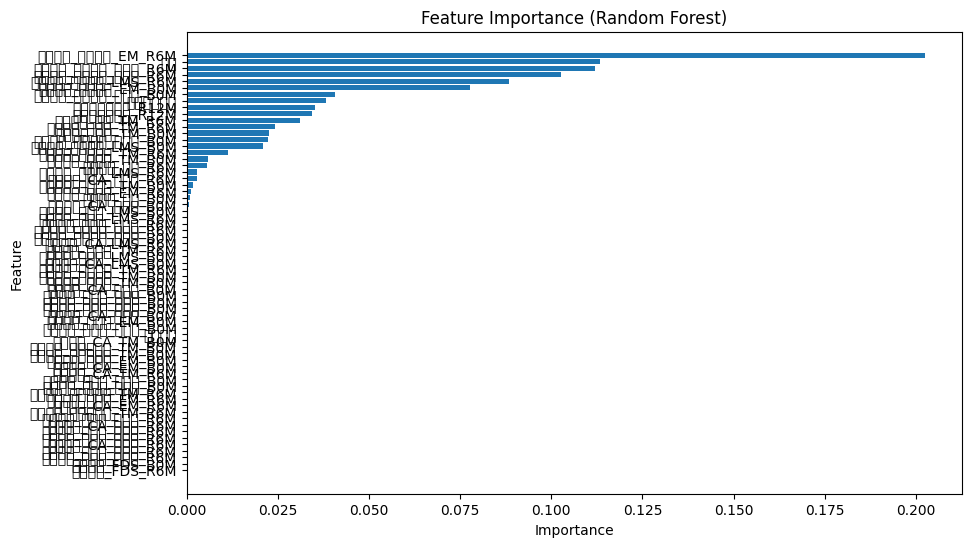

In [21]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()
merged_df = merged_df.iloc[:, 1:]  # 인덱스 1부터 4까지 (0부터 시작)

# 데이터셋이 비어 있는지 확인
if merged_df.empty:
    raise ValueError("결측치 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리
X = merged_df.drop(columns=['Segment'])
y = merged_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 클래스 가중치를 고려한 랜덤 포레스트 모델 학습
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_weighted.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred_weighted = rf_weighted.predict(X_test)

# 5. 평가 결과 출력
print("클래스 가중치 적용 후 랜덤 포레스트 모델 평가")
print(f"정확도: {accuracy_score(y_test, y_pred_weighted) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred_weighted))

# 6. 변수 중요도 출력
importances = rf_weighted.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

# 시각화 - 변수 중요도
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()




SMOTEENN 후 클래스 분포:
Segment
1    255907
0    241815
4    139213
2    102521
3     79209
Name: count, dtype: int64

SMOTEENN 적용 후 랜덤 포레스트 모델 평가
정확도: 67.25%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.09      0.00        32
           1       0.00      0.00      0.00         5
           2       0.12      0.26      0.16      4253
           3       0.27      0.24      0.26     11642
           4       0.86      0.78      0.82     64068

    accuracy                           0.67     80000
   macro avg       0.25      0.28      0.25     80000
weighted avg       0.73      0.67      0.70     80000


변수 중요도:
              Feature  Importance
45   컨택건수_이용유도_EM_R6M    0.159614
0                  연령    0.145836
17   컨택건수_이용유도_EM_B0M    0.098086
41  컨택건수_이용유도_LMS_R6M    0.095941
49  컨택건수_이용유도_청구서_R6M    0.091221
..                ...         ...
51    컨택건수_CA_인터넷_R6M    0.000000
48   컨택건수_리볼빙_청구서_R6M    0.000000
56   컨택건수_리볼빙_당사앱_R6M    0.000000

C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packag

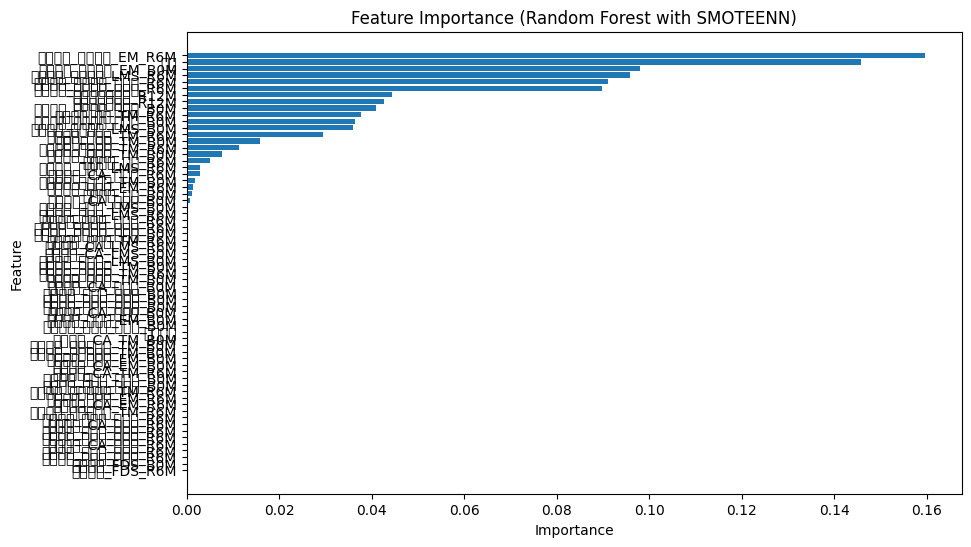

In [22]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()
merged_df = merged_df.iloc[:, 1:]  # 인덱스 1부터 4까지 (0부터 시작)

# 데이터셋이 비어 있는지 확인
if merged_df.empty:
    raise ValueError("결측치 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리
X = merged_df.drop(columns=['Segment'])
y = merged_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTEENN을 이용한 데이터 불균형 처리
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# SMOTEENN 후 클래스 분포 확인
print("\nSMOTEENN 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = rf_model.predict(X_test)

print("\nSMOTEENN 적용 후 랜덤 포레스트 모델 평가")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 출력
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

# 7. 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest with SMOTEENN)')
plt.gca().invert_yaxis()
plt.show()


In [25]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# 데이터셋이 비어 있는지 확인
if merged_df.empty:
    raise ValueError("결측치 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리
X = merged_df.drop(columns=['Segment'])
y = merged_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTEENN을 이용한 데이터 불균형 처리
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# 단계적 변수 선택법
def stepwise_selection(X_train, y_train, threshold_in=0.01, threshold_out=0.005):
    selected_features = []
    remaining_features = list(X_train.columns)
    best_score = 0
    improved = True

    while improved:
        improved = False
        
        # 전진 선택
        for feature in remaining_features:
            current_features = selected_features + [feature]
            model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
            model.fit(X_train[current_features], y_train)
            score = model.score(X_train[current_features], y_train)
            if score > best_score + threshold_in:
                best_score = score
                best_feature = feature
                improved = True
        
        if improved:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            improved = False
            
            # 후진 제거
            for feature in selected_features:
                temp_features = list(selected_features)
                temp_features.remove(feature)
                if len(temp_features) == 0:
                    continue
                model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
                model.fit(X_train[temp_features], y_train)
                score = model.score(X_train[temp_features], y_train)
                if score > best_score - threshold_out:
                    best_score = score
                    selected_features.remove(feature)
                    improved = True
                    
    return selected_features

# 변수 선택 수행
selected_features = stepwise_selection(X_train_resampled, y_train_resampled)

# 4. 최적 변수로 XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled[selected_features], y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test[selected_features])

print("\nXGBoost 모델 평가 (단계적 변수 선택법 + SMOTEENN 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 선택된 변수 목록 출력
print("\n선택된 변수 목록:")
print(selected_features)


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:47:01] WARNING: C:\actio


XGBoost 모델 평가 (단계적 변수 선택법 + SMOTEENN 적용)
정확도: 57.84%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.09      0.00        32
           1       0.00      0.00      0.00         5
           2       0.11      0.14      0.12      4253
           3       0.00      0.00      0.00     11642
           4       0.84      0.71      0.77     64068

    accuracy                           0.58     80000
   macro avg       0.19      0.19      0.18     80000
weighted avg       0.68      0.58      0.62     80000


선택된 변수 목록:
['컨택건수_이용유도_EM_R6M']


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


SMOTEENN 후 클래스 분포:
Segment
1    255907
0    241815
4    139213
2    102521
3     79209
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (A와 B 제거 + SMOTEENN 적용)
정확도: 69.52%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.25      0.00        32
           1       0.00      0.00      0.00         5
           2       0.20      0.21      0.20      4253
           3       0.30      0.20      0.24     11642
           4       0.85      0.82      0.83     64068

    accuracy                           0.70     80000
   macro avg       0.27      0.29      0.26     80000
weighted avg       0.74      0.70      0.71     80000


변수 중요도:
              Feature  Importance
9      컨택건수_보험_TM_B0M    0.110368
37     컨택건수_보험_TM_R6M    0.080684
21  컨택건수_이용유도_청구서_B0M    0.076626
25  컨택건수_이용유도_인터넷_B0M    0.074280
45   컨택건수_이용유도_EM_R6M    0.065376
..                ...         ...
51    컨택건수_CA_인터넷_R6M    0.000000
48   컨택건수_리볼빙_청구서_R6M    0.000000
56   컨택건수_리볼빙_당사앱_R6M    0.000000
59       컨택건수_FDS_B0M    0.000000
61       컨택건수_FDS_R6M    0.000000

[64 rows x 2 columns]


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packag

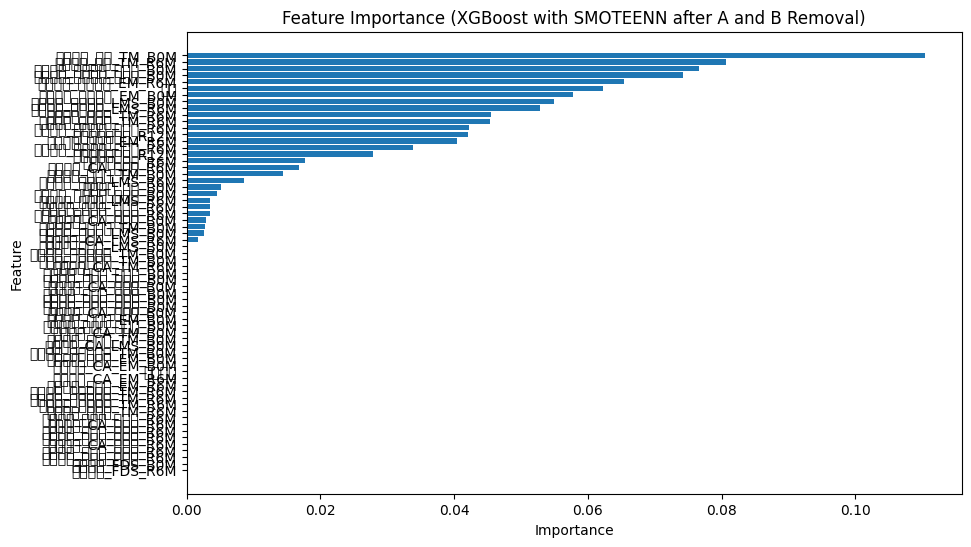

In [26]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리
X = filtered_df.drop(columns=['Segment'])
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTEENN을 이용한 데이터 불균형 처리
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# SMOTEENN 후 클래스 분포 확인
print("\nSMOTEENN 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (A와 B 제거 + SMOTEENN 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

# 7. 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost with SMOTEENN after A and B Removal)')
plt.gca().invert_yaxis()
plt.show()



변수 중요도:
              Feature  Importance
9      컨택건수_보험_TM_B0M    0.110368
37     컨택건수_보험_TM_R6M    0.080684
21  컨택건수_이용유도_청구서_B0M    0.076626
25  컨택건수_이용유도_인터넷_B0M    0.074280
45   컨택건수_이용유도_EM_R6M    0.065376
0                  연령    0.062236
17   컨택건수_이용유도_EM_B0M    0.057708
13  컨택건수_이용유도_LMS_B0M    0.054927
41  컨택건수_이용유도_LMS_R6M    0.052776
30    컨택건수_카드론_TM_R6M    0.045481
33   컨택건수_이용유도_TM_R6M    0.045318
53  컨택건수_이용유도_인터넷_R6M    0.042257
63       캠페인접촉일수_R12M    0.042118
42    컨택건수_카드론_EM_R6M    0.040415
49  컨택건수_이용유도_청구서_R6M    0.033856
62       캠페인접촉건수_R12M    0.027869
60        컨택건수_채권_R6M    0.017651
47    컨택건수_CA_청구서_R6M    0.016792
2     컨택건수_카드론_TM_B0M    0.014391
38   컨택건수_카드론_LMS_R6M    0.008512
58        컨택건수_채권_B0M    0.005168
29  컨택건수_이용유도_당사앱_B0M    0.004534
40   컨택건수_리볼빙_LMS_R6M    0.003491
46   컨택건수_카드론_청구서_R6M    0.003439
57  컨택건수_이용유도_당사앱_R6M    0.003438
19    컨택건수_CA_청구서_B0M    0.002954
5    컨택건수_이용유도_TM_B0M    0.002780
10   컨택건수_카드론_LMS_B0M    0.002641
39   

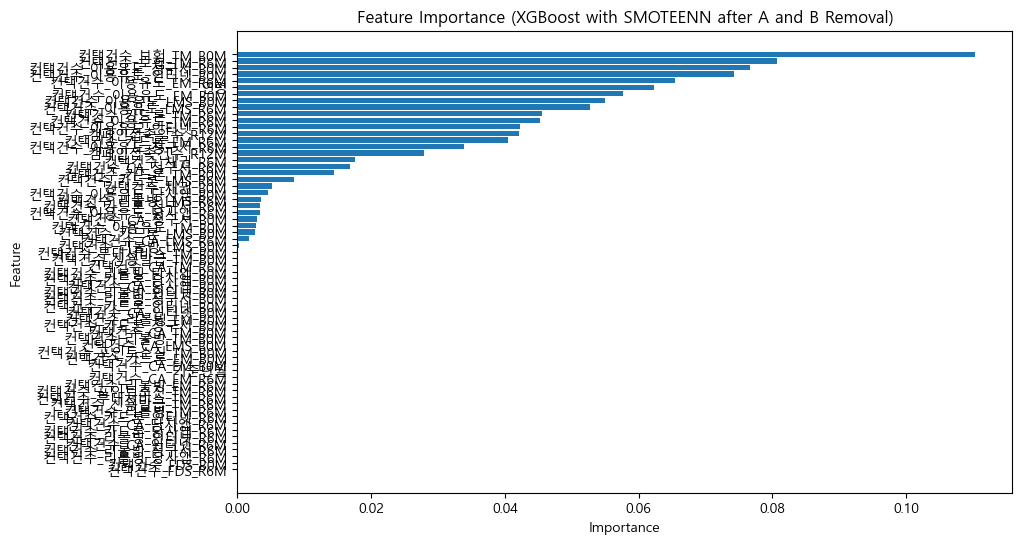

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

pd.set_option('display.max_rows', None)
# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

# 7. 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost with SMOTEENN after A and B Removal)')
plt.gca().invert_yaxis()
plt.show()

In [32]:
# 변수 중요도 0.01 이상으로 1차 필터링
filtered_features = feature_importance[feature_importance['Importance'] >= 0.01]

# 누적 중요도 95% 이하로 2차 필터링
filtered_features['Cumulative'] = filtered_features['Importance'].cumsum()
selected_features = filtered_features[filtered_features['Cumulative'] <= 0.95]['Feature'].tolist()

print("최종 선택된 변수 목록:")
print(selected_features)


최종 선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_인터넷_B0M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_EM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_카드론_TM_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\3943095530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features['Cumulative'] = filtered_features['Importance'].cumsum()


In [33]:
# 선택된 변수로 모델 학습
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

xgb_model.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_selected)
print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:03:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 80.41%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.43      0.06      0.10      4253
           3       0.43      0.08      0.13     11642
           4       0.82      0.99      0.89     64068

    accuracy                           0.80     80000
   macro avg       0.34      0.22      0.23     80000
weighted avg       0.74      0.80      0.74     80000



C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
import pyarrow.parquet as pq
import pandas as pd

# Parquet 파일 읽기
table = pq.read_table('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201807_train_마케팅정보.parquet')
df = table.to_pandas()

df.to_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201807_train_마케팅정보.csv', index=False, encoding = 'euc-kr')

df1 = pd.read_csv('C:/Users/tnfus/Downloads/open/train/train_회원정보.csv', encoding = 'UTF-8')
df2 = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201807_train_마케팅정보.csv', encoding = 'euc-kr')
# ID 기준으로 병합 (inner join)
merged_df = pd.merge(df1, df2, on='ID', how='outer')

# 병합 결과를 CSV로 저장
merged_df.to_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201807_train_마케팅정보_merged.csv', index=False, encoding='euc-kr')

In [38]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
import pandas as pd

# 이미 선택된 변수 목록
selected_features = [
    '컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', 
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', 
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', 
    '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', 
    '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', 
    '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M'
]

print("선택된 변수 목록:")
print(selected_features)

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리 (선택된 변수만 사용)
X = filtered_df[selected_features]
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTETomek을 이용한 데이터 불균형 처리
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# SMOTETomek 후 클래스 분포 확인
print("\nSMOTETomek 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습 (선택된 변수만 사용)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\794145775.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



SMOTETomek 후 클래스 분포:
Segment
1    256274
0    256267
4    252390
2    250318
3    248319
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:27:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 73.92%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.16      0.25      0.19      4253
           3       0.33      0.21      0.25     11642
           4       0.85      0.87      0.86     64068

    accuracy                           0.74     80000
   macro avg       0.27      0.27      0.26     80000
weighted avg       0.74      0.74      0.73     80000


변수 중요도:
              Feature  Importance
2   컨택건수_이용유도_청구서_B0M    0.133135
6    컨택건수_이용유도_EM_B0M    0.094242
7   컨택건수_이용유도_LMS_B0M    0.069711
5                  연령    0.069705
10   컨택건수_이용유도_TM_R6M    0.065508
3   컨택건수_이용유도_인터넷_B0M    0.063723
13    컨택건수_카드론_EM_R6M    0.053669
11  컨택건수_이용유도_인터넷_R6M    0.052265
17    컨택건수_CA_청구서_R6M    0.050865
14  컨택건수_이용유도_청구서_R6M    0.050712
9     컨택건수_카드론_TM_R6M    0.050452
1      컨택건수_보험_TM_R6M    0.046374
4    컨택건수_이용유도

In [46]:
merged_df = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201810_train_마케팅정보_merged.csv', encoding = 'euc-kr')

In [48]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
import pandas as pd

# 이미 선택된 변수 목록
selected_features = [
    '컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', 
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', 
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', 
    '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', 
    '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', 
    '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M'
]

print("선택된 변수 목록:")
print(selected_features)

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리 (선택된 변수만 사용)
X = filtered_df[selected_features]
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTETomek을 이용한 데이터 불균형 처리
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# SMOTETomek 후 클래스 분포 확인
print("\nSMOTETomek 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습 (선택된 변수만 사용)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\2008642889.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



SMOTETomek 후 클래스 분포:
Segment
1    256274
0    256166
4    252377
2    250355
3    248330
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 72.68%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.15      0.27      0.19      4253
           3       0.32      0.23      0.27     11642
           4       0.85      0.85      0.85     64068

    accuracy                           0.73     80000
   macro avg       0.26      0.27      0.26     80000
weighted avg       0.74      0.73      0.73     80000


변수 중요도:
              Feature  Importance
7   컨택건수_이용유도_LMS_B0M    0.142615
3   컨택건수_이용유도_인터넷_B0M    0.089973
2   컨택건수_이용유도_청구서_B0M    0.075574
5                  연령    0.066282
15       캠페인접촉건수_R12M    0.064671
6    컨택건수_이용유도_EM_B0M    0.060695
12       캠페인접촉일수_R12M    0.059017
10   컨택건수_이용유도_TM_R6M    0.053817
11  컨택건수_이용유도_인터넷_R6M    0.053057
17    컨택건수_CA_청구서_R6M    0.052751
13    컨택건수_카드론_EM_R6M    0.050152
14  컨택건수_이용유도_청구서_R6M    0.047779
9     컨택건수_카드론

In [49]:
merged_df = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201809_train_마케팅정보_merged.csv', encoding = 'euc-kr')

In [50]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
import pandas as pd

# 이미 선택된 변수 목록
selected_features = [
    '컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', 
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', 
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', 
    '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', 
    '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', 
    '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M'
]

print("선택된 변수 목록:")
print(selected_features)

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리 (선택된 변수만 사용)
X = filtered_df[selected_features]
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTETomek을 이용한 데이터 불균형 처리
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# SMOTETomek 후 클래스 분포 확인
print("\nSMOTETomek 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습 (선택된 변수만 사용)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\2008642889.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



SMOTETomek 후 클래스 분포:
Segment
1    256274
0    256265
4    252534
2    250386
3    248455
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 73.77%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.16      0.26      0.20      4253
           3       0.32      0.21      0.26     11642
           4       0.85      0.87      0.86     64068

    accuracy                           0.74     80000
   macro avg       0.27      0.27      0.26     80000
weighted avg       0.74      0.74      0.73     80000


변수 중요도:
              Feature  Importance
2   컨택건수_이용유도_청구서_B0M    0.136275
6    컨택건수_이용유도_EM_B0M    0.107288
5                  연령    0.074071
3   컨택건수_이용유도_인터넷_B0M    0.067518
10   컨택건수_이용유도_TM_R6M    0.065891
11  컨택건수_이용유도_인터넷_R6M    0.060139
7   컨택건수_이용유도_LMS_B0M    0.057218
9     컨택건수_카드론_TM_R6M    0.051651
17    컨택건수_CA_청구서_R6M    0.049565
4    컨택건수_이용유도_EM_R6M    0.048309
15       캠페인접촉건수_R12M    0.044520
14  컨택건수_이용유도_청구서_R6M    0.043137
12       캠페인접촉

In [51]:
merged_df = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201808_train_마케팅정보_merged.csv', encoding = 'euc-kr')

In [52]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
import pandas as pd

# 이미 선택된 변수 목록
selected_features = [
    '컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', 
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', 
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', 
    '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', 
    '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', 
    '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M'
]

print("선택된 변수 목록:")
print(selected_features)

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리 (선택된 변수만 사용)
X = filtered_df[selected_features]
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTETomek을 이용한 데이터 불균형 처리
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# SMOTETomek 후 클래스 분포 확인
print("\nSMOTETomek 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습 (선택된 변수만 사용)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\2008642889.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



SMOTETomek 후 클래스 분포:
Segment
1    256273
0    256235
4    252542
2    250038
3    248178
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 74.26%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.17      0.27      0.21      4253
           3       0.33      0.21      0.26     11642
           4       0.85      0.87      0.86     64068

    accuracy                           0.74     80000
   macro avg       0.27      0.27      0.27     80000
weighted avg       0.74      0.74      0.74     80000


변수 중요도:
              Feature  Importance
2   컨택건수_이용유도_청구서_B0M    0.127136
7   컨택건수_이용유도_LMS_B0M    0.097956
6    컨택건수_이용유도_EM_B0M    0.072752
3   컨택건수_이용유도_인터넷_B0M    0.072441
5                  연령    0.070924
4    컨택건수_이용유도_EM_R6M    0.069386
10   컨택건수_이용유도_TM_R6M    0.060956
9     컨택건수_카드론_TM_R6M    0.057539
11  컨택건수_이용유도_인터넷_R6M    0.055321
14  컨택건수_이용유도_청구서_R6M    0.054131
1      컨택건수_보험_TM_R6M    0.049280
17    컨택건수_CA_청구서_R6M    0.041011
12       캠페인접촉

In [53]:
merged_df = pd.read_csv('C:/Users/tnfus/Downloads/open/train/7.마케팅정보/201807_train_마케팅정보_merged.csv', encoding = 'euc-kr')

In [54]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
import pandas as pd

# 이미 선택된 변수 목록
selected_features = [
    '컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', 
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', 
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', 
    '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', 
    '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', 
    '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M'
]

print("선택된 변수 목록:")
print(selected_features)

# 1. 데이터 전처리
label_encoder = LabelEncoder()

# 범주형 변수 인코딩
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))

# 결측치 제거
merged_df = merged_df.dropna()

# A와 B 클래스 제거
filtered_df = merged_df[~merged_df['Segment'].isin(['A', 'B'])]

# 데이터셋이 비어 있는지 확인
if filtered_df.empty:
    raise ValueError("A와 B 제거 후 데이터셋이 비어 있습니다.")

# 독립 변수(X)와 종속 변수(y) 분리 (선택된 변수만 사용)
X = filtered_df[selected_features]
y = filtered_df['Segment']

# 수치형 변수 스케일링
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTETomek을 이용한 데이터 불균형 처리
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# SMOTETomek 후 클래스 분포 확인
print("\nSMOTETomek 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())

# 4. XGBoost 모델 학습 (선택된 변수만 사용)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)

print("\nXGBoost 모델 평가 (선택 변수 적용)")
print(f"정확도: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 분석
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)

선택된 변수 목록:
['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_EM_R6M', '연령', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_인터넷_R6M', '캠페인접촉일수_R12M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_청구서_R6M', '캠페인접촉건수_R12M', '컨택건수_채권_R6M', '컨택건수_CA_청구서_R6M']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14796\2008642889.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



SMOTETomek 후 클래스 분포:
Segment
1    256272
0    256258
4    252378
2    249704
3    247772
Name: count, dtype: int64


C:\Users\tnfus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:06:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost 모델 평가 (선택 변수 적용)
정확도: 74.08%
분류 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         5
           2       0.18      0.27      0.22      4253
           3       0.32      0.22      0.26     11642
           4       0.85      0.87      0.86     64068

    accuracy                           0.74     80000
   macro avg       0.27      0.27      0.27     80000
weighted avg       0.74      0.74      0.74     80000


변수 중요도:
              Feature  Importance
7   컨택건수_이용유도_LMS_B0M    0.115838
6    컨택건수_이용유도_EM_B0M    0.106392
3   컨택건수_이용유도_인터넷_B0M    0.084127
2   컨택건수_이용유도_청구서_B0M    0.082312
5                  연령    0.074781
10   컨택건수_이용유도_TM_R6M    0.066959
11  컨택건수_이용유도_인터넷_R6M    0.052911
1      컨택건수_보험_TM_R6M    0.048589
14  컨택건수_이용유도_청구서_R6M    0.048065
9     컨택건수_카드론_TM_R6M    0.043212
4    컨택건수_이용유도_EM_R6M    0.042623
13    컨택건수_카드론_EM_R6M    0.040886
0      컨택건수_보험

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

# 직접 계산한 F1-score (전체 평균)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# 클래스별 F1-score
f1_per_class = f1_score(y_test, y_pred, average=None)

print(f"F1-score (Macro Average): {f1_macro:.4f}")
print(f"F1-score (Weighted Average): {f1_weighted:.4f}")
print("클래스별 F1-score:")
for idx, score in enumerate(f1_per_class):
    print(f"Class {idx}: {score:.4f}")

F1-score (Macro Average): 0.2674
F1-score (Weighted Average): 0.7376
클래스별 F1-score:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.2156
Class 3: 0.2621
Class 4: 0.8591
